In [3]:
import pandas as pd
import os

In [4]:
import seaborn as sns
import numpy as np
import random

In [5]:
transactions = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/transactions_train.csv")

In [6]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [7]:
print(transactions.info())
print(transactions.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB
None
(31788324, 5)


### Understanding the customer transactions
**We can see that the transaction data contains more than 30 million records. So we need to sample the records to get more conveient dataset for analysis. Before doing the sampling, we need to understand the data thoroughly for which we do exploratory data analysis.**

In [8]:
customer_idsgrouped = transactions.groupby("customer_id")["price"].mean()
print(type(customer_idsgrouped))
print(customer_idsgrouped.describe())
print(len(customer_idsgrouped))

<class 'pandas.core.series.Series'>
count    1.362281e+06
mean     2.875476e-02
std      1.429338e-02
min      7.627119e-04
25%      2.095763e-02
50%      2.613317e-02
75%      3.336083e-02
max      5.067797e-01
Name: price, dtype: float64
1362281


**From the above code shunk we get to know that there are 1362281 unique customer_ids**\
**Next we plot the distribution of the mean price or basket values of the customer_ids**

In [9]:
import matplotlib.pyplot as plt
#https://www.marsja.se/how-to-change-size-of-seaborn-plot/#:~:text=Now%2C%20if%20we%20only%20to%20increase%20Seaborn%20plot,%23%20Change%20seaborn%20plot%20size%20fig.set_size_inches%20%2812%2C%208%29

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Price Histogram with Density Plot')

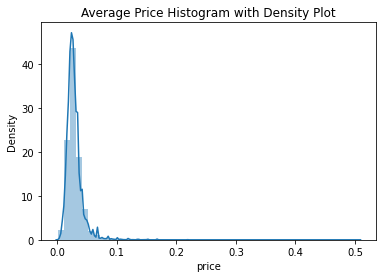

In [10]:
ax = sns.distplot(customer_idsgrouped)
ax.set_title('Average Price Histogram with Density Plot')

**We can see that the distribution plot of the mean prices are close to normal, so we donot need much treatment for normalizing the distribution.**

Since the distribution of the mean prices grouped by the customer ids lies in a normal distribution, we can sample the dataset by taking the customer ids and we can go by simple random sampling and stratified sampling. Post that we explore the mean price graphs for both the samples and check whether the distribution is normal.

In [11]:
random.seed(3)
randomsample_ids = random.sample(list(customer_idsgrouped.index), k = int(0.10*len(customer_idsgrouped.index)))
print(len(randomsample_ids))

136228


Checking the mean distribution plot of the sampled ids

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average Price Histogram of sample with Density Plot')

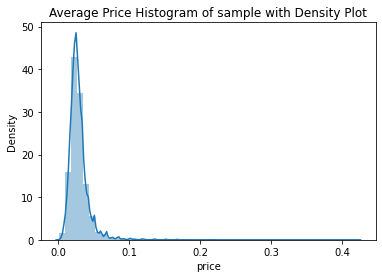

In [13]:
sample_custids_data  = customer_idsgrouped[customer_idsgrouped.index.isin(randomsample_ids)]
ax1 = sns.distplot(sample_custids_data)
ax1.set_title('Average Price Histogram of sample with Density Plot')

We see that the random sample gives us a similar density plot for the mean prices. Thus using the sample ids we extract sample from the original dataset.

In [14]:
transactions_sampled = transactions[transactions['customer_id'].isin(randomsample_ids)]
transactions_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3188599 entries, 14 to 31788290
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 146.0+ MB


Let us check the descriptive features of the random sampled data set vs the original data set

In [15]:
print(transactions.describe())
print(transactions.shape)
print(transactions_sampled.describe())
print(customer_idsgrouped.skew())
print(sample_custids_data.skew())

         article_id         price  sales_channel_id
count  3.178832e+07  3.178832e+07      3.178832e+07
mean   6.962272e+08  2.782927e-02      1.704028e+00
std    1.334480e+08  1.918113e-02      4.564786e-01
min    1.087750e+08  1.694915e-05      1.000000e+00
25%    6.328030e+08  1.581356e-02      1.000000e+00
50%    7.145820e+08  2.540678e-02      2.000000e+00
75%    7.865240e+08  3.388136e-02      2.000000e+00
max    9.562170e+08  5.915254e-01      2.000000e+00
(31788324, 5)
         article_id         price  sales_channel_id
count  3.188599e+06  3.188599e+06      3.188599e+06
mean   6.962539e+08  2.785591e-02      1.703008e+00
std    1.332213e+08  1.929524e-02      4.569330e-01
min    1.087750e+08  1.864407e-04      1.000000e+00
25%    6.328030e+08  1.579661e-02      1.000000e+00
50%    7.144260e+08  2.540678e-02      2.000000e+00
75%    7.863470e+08  3.388136e-02      2.000000e+00
max    9.537630e+08  5.915254e-01      2.000000e+00
4.197032766088607
4.1137320064599505


We see that there is a close similarity of the descriptive metrics of the features of the sampled and the original dataset. Though not refelcted in the distribution plots, we can see that there is a skewness in the price distributions of the data and the sample.

**Next we import the datasets containing the information about the articles and the customers**

In [16]:
products = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/articles.csv")

In [17]:
products.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [18]:
print(products['article_id'].nunique())
print(transactions_sampled['article_id'].nunique())

105542
86260


In [19]:
product_transactions = pd.merge(transactions_sampled, products,how='left', left_on='article_id', right_on='article_id')

In [20]:
product_transactions.head(3)

,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,252,Sweater,Garment Upper body,...,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Jumper in a soft knit with a slightly wider ne...
1,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,501820043,0.016932,2,501820,SIRPA,252,Sweater,Garment Upper body,...,Tops Knitwear,D,Divided,2,Divided,53,Divided Collection,1003,Knitwear,Jumper in a soft knit with a slightly wider ne...
2,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,674681001,0.008458,2,674681,Felicia Tank,253,Vest top,Garment Upper body,...,Basic 1,D,Divided,2,Divided,51,Divided Basics,1002,Jersey Basic,Short top in ribbed jersey with narrow shoulde...


In [21]:
product_transactions.columns

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [25]:
product_transactions = product_transactions[['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id',
       'product_code', 'prod_name', 'product_type_name',
       'product_group_name', 
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
      'perceived_colour_value_name',
       'perceived_colour_master_name',
      'department_name', 'index_code','index_name',
        'index_group_name',  'section_name',
       'garment_group_name', 'detail_desc', 'transaction_custdat_id']]

In [24]:
product_transactions['index_code'].nunique()

10

In [23]:
product_transactions['transaction_custdat_id'] = product_transactions['customer_id'] + product_transactions['t_dat']

In [26]:
product_transactions['transaction_custdat_id'].value_counts()

c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e32018-12-17    336
61da44a2758206d5701771f4315637b40c8321b511191654fb1430a6408e4dfa2019-02-23    176
6e91d482c348bc118d8d00df01b73f72471d194987616f1008074e4280c29ebb2019-01-31    174
75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b2018-09-29    169
c58c3ea821c5447217eadb8112175bcdfb10ba6c1905e38a451b4b0a107494802019-05-24    164
                                                                             ... 
73b9358207d5d3712ab947088916343cdc260a726904f2ef3ba29294d0f23eeb2019-01-22      1
325b2fb2f53746b68d4564797151418f28d92f0dc30608add12b269f4a4f1a7d2019-11-06      1
b2c470b1f57b96c69750cc0222df33bc5857b53ca98bc4f2c99e2cc7325967e52019-09-10      1
d9530829cea1ce0199e5b570d33120d1b3f9179c43f9e3ef0490967332cd5a7d2018-12-04      1
eb197acafe3d6ca914f4aa77caf2ecca1e587e447f2a57d79400de932e44e02a2019-07-10      1
Name: transaction_custdat_id, Length: 909708, dtype: int64

In [27]:
customers = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/customers.csv")

In [175]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [29]:
print(customers['customer_id'].nunique())
print(customers.shape)

1048575
(1048575, 7)


In [30]:
customers.shape

(1048575, 7)

In [32]:
#full_data = pd.merge(product_transactions, customers, how = "left", left_on = "customer_id", right_on = "customer_id")

In [36]:
###since we have already created and exported full_data to the directory, we need to reimport it

full_data = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/full_data.csv")

**The full data must be cleaned to remove duplicate transactions**

In [41]:
full_data[full_data['transaction_custdat_id'] == 'c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40aab1d87a64ff39987e32018-12-17'].head(3)

,Unnamed: 0,t_dat,customer_id,article_id,price,sales_channel_id,product_code,prod_name,product_type_name,product_group_name,...,department_name,index_name,section_name,garment_group_name,detail_desc,transaction_custdat_id,Active,club_member_status,fashion_news_frequency,age
384670,384670,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0
384671,384671,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0
384672,384672,2018-12-17,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,706733001,0.050831,2,706733,Cross Cardigan,Cardigan,Garment Upper body,...,Jersey inactive from s1,Menswear,Contemporary Street,Jersey Fancy,Cardigan in lightweight sweatshirt fabric with...,c2f0cdda2dc3042ccd9fcd8253fd8e368769840581e40a...,NaN,ACTIVE,NONE,52.0


We can see that there are multiple transactions isntances of the same product code. Some customers seemed to buy the same product in bulk volume. We have to confirm if the product_code represents unique items. If yes, then we can reduce the dataframe to unique items per record and create another variable called quantity of products for each unique product.

In [42]:
full_data['transaction_custdat_id'].nunique()

909708

In [49]:
#Let us confirm if product code indicates unique products
print(full_data['prod_name'].nunique())
print(full_data['product_type_name'].nunique())
print(full_data['graphical_appearance_name'].nunique())
print(full_data['product_group_name'].nunique())
print(full_data['garment_group_name'].nunique())

39160
128
30
19
21


**The garment_group_name is a broder category while the others are granular category**

The full_data is cleaned for duplicates using groupby and size. The same data is written to a folder. So we can import the file and reuse it directly.

In [69]:
x_data = full_data.groupby(['t_dat', 'customer_id', 'article_id', 'product_code',
       'prod_name', 'product_type_name', 'product_group_name',
       'graphical_appearance_name', 'colour_group_name',
       'perceived_colour_value_name', 'perceived_colour_master_name',
       'department_name', 'index_name', 'section_name', 'garment_group_name',
       'detail_desc', 'transaction_custdat_id', 'club_member_status',
       'fashion_news_frequency', 'age']).size().reset_index().\
    rename(columns={0:'records'})

In [85]:
#x_data.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_1.csv")

In [117]:
x_data = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data.csv")

In [51]:
x_data.shape

(2153323, 22)

In [52]:
x_data['transaction_custdat_id'].value_counts()

75c54a755b8a467e53e0a4e01833deb029734feb22ad25438137925123a38f8b2018-09-29    159
898ede9fb639eb2aedb2d1d433eea958817e2bbb9f94524b3a0709af6fb5257e2019-11-12     76
898ede9fb639eb2aedb2d1d433eea958817e2bbb9f94524b3a0709af6fb5257e2019-02-21     59
8449c2d5192fde129f3a0fbe67998bbb8a55d4253082eeb4c832ce9635cf88262018-10-21     55
2e17f6f8bec3ab2ab14b071c6afa907606699cd67aeb4cedbda13b2809b3a7132019-04-06     54
                                                                             ... 
37798cf63f06852670e3fb95c07d13ab209135ccf957e0a226a8592a792f9cb52018-11-18      1
562778970727dbadf22096a20e5d9e003f021498d1650bb91908de2cfa39d94e2019-06-25      1
b29c6fff0b591d9da29215d2e7a02eb661973dc1a2ca382ff6f81ae57613fd632019-04-16      1
8906e525a1875205f696ae5b69ff63bafbec40e54903c3edec562dc4c9c6c97f2019-12-29      1
b8e01b89a9e3011f26771fc0281c11d6fdd32af6cf5bf394879a2f97c1b87f692020-03-20      1
Name: transaction_custdat_id, Length: 685925, dtype: int64

In [57]:
x_data['unique_id_items'] = x_data['transaction_custdat_id'] + str(x_data['article_id'])

In [60]:
print(x_data['transaction_custdat_id'].nunique())
print(x_data['unique_id_items'].nunique())

685925
685925


This confirms that all the transactions are unique transactions of uniques article ids.

**We have the merged total data of customers, products and transactions but we need to do step by step analysis on these data variables.**

### Step 1: Customer data analysis

**In order to understand the customer segments by different approaches, we need to arrange the data with lots of grouping and regrouping**

**Analysis of basket size across different age groups, fashion news consumption. Can the pattern be realted for inclusivity across different age groups and choices?**

In [62]:
###Let us take the whole data x_data, group by customer_ids and analyse variation of fashion news frequency and memberships.
x_data.columns
fashion_news_data = pd.DataFrame(x_data.groupby('customer_id')[['fashion_news_frequency','club_member_status']].max())
fashion_news_data.reset_index(inplace = True)

In [64]:
##Let's create cross tab of fashion_news_frequency and club_member_status
##Let us check the variation of product_type_name and prod_name across product_group_name by using chi square test
# create contingency table
fnandmembership_crosstab = pd.crosstab(fashion_news_data['fashion_news_frequency'],
                            fashion_news_data['club_member_status'],
                           margins=True, margins_name="Total")
fnandmembership_crosstab

club_member_status,ACTIVE,LEFT CLUB,PRE-CREATE,Total
fashion_news_frequency,,,,
Monthly,76,0,5,81
NONE,59219,37,5986,65242
Regularly,35759,0,438,36197
Total,95054,37,6429,101520


In [207]:
##Doing chi-square test of fashion_news_frequency and membership_status to check association
# significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = fashion_news_data['fashion_news_frequency'].unique()
columns = fashion_news_data['club_member_status'].unique()
for i in columns:
    for j in rows:
        O = fnandmembership_crosstab[i][j]
        E = fnandmembership_crosstab[i]['Total'] * fnandmembership_crosstab['Total'][j] / fnandmembership_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# The p-value approach
print("Approach 1: The p-value approach to hypothesis testing in the decision rule")
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

Approach 1: The p-value approach to hypothesis testing in the decision rule
chisquare-score is: 2512.8378366793804  and p value is: 0.0
Null Hypothesis is rejected.


**We get that there is significant association of fashion_news_frequency and membership_status and from the cross tab we get the largest segments are Active members with no fashion news consumption, Active members with regular fashion news consumption, Pre-create members with no fashion news consumption. These are segments we pick for further analysis.**

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Histogram with Density Plot')

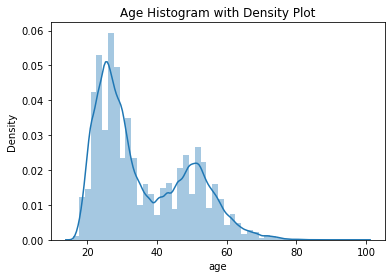

In [66]:
age = sns.distplot(x_data["age"])
age.set_title('Age Histogram with Density Plot') 

In [78]:
###Extract the top 10 frequently brought products by different customers for each different segment.
#x_data.columns
x_dataseg1a = x_data[(x_data['memberships_and_FN'] == 'Active_Idlers') & (x_data['age_bracket'] == 'Gen_Z')]
x_dataseg1b = x_data[(x_data['memberships_and_FN'] == 'Active_Idlers') & (x_data['age_bracket'] == 'Young_millenials')]
x_dataseg1c = x_data[(x_data['memberships_and_FN'] == 'Active_Idlers') & (x_data['age_bracket'] == 'Gen_X_and_Y')]
x_dataseg1d = x_data[(x_data['memberships_and_FN'] == 'Active_Idlers') & (x_data['age_bracket'] == 'Baby_Boomers_X')]
x_dataseg2a = x_data[(x_data['memberships_and_FN'] == 'Active_fashionishtas') & (x_data['age_bracket'] == 'Gen_Z')]
x_dataseg2b = x_data[(x_data['memberships_and_FN'] == 'Active_fashionishtas') & (x_data['age_bracket'] == 'Young_millenials')]
x_dataseg2c = x_data[(x_data['memberships_and_FN'] == 'Active_fashionishtas') & (x_data['age_bracket'] == 'Gen_X_and_Y')]
x_dataseg2d = x_data[(x_data['memberships_and_FN'] == 'Active_fashionishtas') & (x_data['age_bracket'] == 'Baby_Boomers_X')]
#x_dataseg3a = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Gen_Z')]
#x_dataseg3b = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Young_millenials')]
#x_dataseg3c = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Gen_X_and_Y')]
#x_dataseg3d = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Baby_Boomers_X')]
#x_dataseg4a = x_data[(x_data['memberships_and_FN'] == 'Prospect_Idlers') & (x_data['age_bracket'] == 'Gen_z')]
x_dataseg4b = x_data[(x_data['memberships_and_FN'] == 'Prospect_Idlers') & (x_data['age_bracket'] == 'Young_millenials')]
x_dataseg4c = x_data[(x_data['memberships_and_FN'] == 'Prospect_Idlers') & (x_data['age_bracket'] == 'Gen_X_and_Y')]
x_dataseg4d = x_data[(x_data['memberships_and_FN'] == 'Prospect_Idlers') & (x_data['age_bracket'] == 'Baby_Boomers_X')]

In [79]:
x_dataseg2a =  x_data[(x_data['memberships_and_FN'] == 'Active_fashionishtas') & (x_data['age_bracket'] == 'Gen_Z')]

In [80]:
x_dataseg3a = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Gen_Z')]
x_dataseg3a.head()
x_dataseg3b = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Young_millenials')]
x_dataseg3c = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Gen_X_and_Y')]
x_dataseg3d = x_data[(x_data['memberships_and_FN'] == 'Prospect_Fashionistas') & (x_data['age_bracket'] == 'Baby_Boomers_X')]
x_dataseg4a = x_data[(x_data['memberships_and_FN'] == 'Prospect_Idlers') & (x_data['age_bracket'] == 'Gen_Z')]

In [81]:
##Most frequently brought products for each segments
print(x_dataseg1a['article_id'].value_counts().sort_values(ascending = False).head(n=10).index)
Active_Gen_Z_favs = x_dataseg1a['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Active_millenial_favs = x_dataseg1b['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Active_XandY_favs = x_dataseg1c['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Active_Babyboomer_favs = x_dataseg1d['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Activefashionishta_Gen_Z_favs = x_dataseg2a['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Activefashionishta_millenial_favs = x_dataseg2b['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Activefashionishta_XandY_favs = x_dataseg2c['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Activefashionishta_Babyboomer_favs = x_dataseg2d['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospectfashionishta_Gen_Z_favs = x_dataseg3a['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospectfashionishta_favs = x_dataseg3b['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospectfashionishta_XandY_favs = x_dataseg3c['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospectfashionista_Babyboomer_favs = x_dataseg3d['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospect_Gen_Z_favs = x_dataseg4a['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospect_millenial_favs = x_dataseg4b['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospect_XandY_favs = x_dataseg4c['article_id'].value_counts().sort_values(ascending = False).head(n=10).index
Prospect_Babyboomer_favs = x_dataseg4d['article_id'].value_counts().sort_values(ascending = False).head(n=30).index

Int64Index([706016001, 706016002, 759871002, 372860001, 464297007, 372860002,
            610776002, 720125001, 448509014, 706016003],
           dtype='int64')


In [82]:
###Check the hypothesis - •	The basket sizes of the customers significantly vary across age-groups/segments as created.
Active_Gen_bs = pd.DataFrame(x_dataseg1a.groupby('customer_id')['transaction_custdat_id'].value_counts())
Active_Gen_bs['index_tuple'] = Active_Gen_bs.index
Active_Gen_bs['cust_id'] = Active_Gen_bs['index_tuple'].apply(lambda x: x[0])
Active_Gen_bs['trans_id'] = Active_Gen_bs['index_tuple'].apply(lambda x: x[1])
Active_Gen_bs = Active_Gen_bs[['cust_id', 'trans_id', 'transaction_custdat_id']]
active_genz_bsize = Active_Gen_bs.groupby('cust_id')['transaction_custdat_id'].mean()
#.reset_index()['transaction_custdat_id'].mean()
type([pd.DataFrame(active_genz_bsize.reset_index())['transaction_custdat_id']])
[pd.DataFrame(active_genz_bsize.reset_index())['transaction_custdat_id']]

[0         2.000000
 1        11.000000
 2         5.500000
 3         5.142857
 4         6.166667
            ...    
 18423     3.000000
 18424     3.000000
 18425     2.800000
 18426     2.000000
 18427     1.000000
 Name: transaction_custdat_id, Length: 18428, dtype: float64]

In [86]:
segmentnames = ['Active_Gen_Z', 'Active_millenial', 'Active_XandY', 'Active_Babyboomer', 'Activefashionishta_Gen_Z', 'Activefashionishta_millenial',
               'Activefashionishta_XandY', 'Activefashionishta_Babyboomer', 'Prospectfashionishta_Gen_Z','Prospectfashionishta_millenial' , 
                'Prospectfashionishta_XandY', 'Prospectfashionista_Babyboomer','Prospect_Gen_Z' , 'Prospect_millenial', 'Prospect_XandY',
               'Prospect_Babyboomer']
basketsizes = []

for a in [x_dataseg1a, x_dataseg1b, x_dataseg1c, x_dataseg1d, x_dataseg2a, x_dataseg2b,  x_dataseg2c,  x_dataseg2d, x_dataseg3a,
          x_dataseg3b, x_dataseg3c, x_dataseg3d, x_dataseg4a,
           x_dataseg4b, x_dataseg4c, x_dataseg4d] :
    a_bs = pd.DataFrame(a.groupby('customer_id')['transaction_custdat_id'].value_counts())
    a_bs['index_tuple'] = a_bs.index
    a_bs['cust_id'] = a_bs['index_tuple'].apply(lambda x: x[0])
    a_bs['trans_id'] = a_bs['index_tuple'].apply(lambda x: x[1])
    a_bs = a_bs[['cust_id', 'trans_id', 'transaction_custdat_id']]
    a_bsize = a_bs.groupby('cust_id')['transaction_custdat_id'].mean()
    a_bsize = pd.DataFrame(a_bsize)
    a_bsize['basketsizes'] = a_bsize['transaction_custdat_id']
    a_bsize = a_bsize.drop('transaction_custdat_id', axis = 1)
    print(a_bsize.columns)
    basketsizes.append(a_bsize)
    print(type(a_bsize))
    #a_list = pd.DataFrame(a_bsize.reset_index())['transaction_custdat_id'].tolist()
    #basketsizes.append(a_list)
    
#segment_vs_baskets = pd.DataFrame({'segmentnames': segmentnames, 'basketsizes': basketsizes })

Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index(['basketsizes'], dtype='object')
<class 'pandas.core.frame.DataFrame'>

In [88]:
segmentandbasketsizes = pd.concat([basketsizes[0],basketsizes[1], basketsizes[2], basketsizes[3], basketsizes[4], basketsizes[5], basketsizes[6],
          basketsizes[7], basketsizes[8], basketsizes[9], basketsizes[10], basketsizes[11], basketsizes[12],basketsizes[13], basketsizes[14], 
                                 basketsizes[15] ])
segmentandbasketsizes.tail()
segmentandbasketsizes['customer_id'] = segmentandbasketsizes.index

In [115]:
##https://towardsdatascience.com/anova-test-with-python-cfbf4013328b
#segmentandbasketsizes.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/segmentandbasketsizes_1.csv")
segmentandbasketsizes = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/segmentandbasketsizes_1.csv")

In [116]:
segmentandbasketsizes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88733 entries, 0 to 88732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cust_id      88733 non-null  object 
 1   basketsizes  88733 non-null  float64
 2   segment      88733 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [67]:
conditions = [
    (x_data['age'] <= 25),
    (x_data['age'] > 25) & (x_data['age'] <= 31),
    (x_data['age'] > 31) & (x_data['age'] <= 48),
    (x_data['age'] > 48)
    ]
values = ['Gen_Z', 'Young_millenials', 'Gen_X_and_Y', 'Baby_Boomers_X']

In [68]:
x_data["age_bracket"] = np.select(conditions, values)

### Creating segments out of age_group, fashion news frequency and memberships.
From the above analysis we see that all the segments across different fashion news consumption frequency and membership statuses are present across different age groups and there is significant association of the age brackets with membership stauses and fashion news consumption.

So we need to retain all the four segments of FN consumption and memberships and analyse them across all the age brackets.

In [69]:
#print(x_data.columns)
#print(full_data.columns)
print(transactions.columns)
transactions['transaction_custdat_id'] = transactions['customer_id'] + transactions['t_dat']

Index(['t_dat', 'customer_id', 'article_id', 'price', 'sales_channel_id'], dtype='object')


In [92]:
df1 = transactions.groupby('transaction_custdat_id')['price'].mean().reset_index()

In [93]:
print(df1.columns)
#df1['mean_price_by_transactions'] = df1['price']
#segemntandbasketsizes = segmentandbasketsizes.reset_index()

Index(['transaction_custdat_id', 'price'], dtype='object')


In [94]:
df1 = df1.drop('price', axis = 1)

In [120]:
segmentandbasketsizes['customer_id'] = segmentandbasketsizes['cust_id']

In [124]:
x_data = pd.merge(x_data, df1, how='left', left_on='transaction_custdat_id', right_on='transaction_custdat_id')

In [123]:
segmentandbasketsizes.head()
#segmentandbasketsizes = segmentandbasketsizes.drop('cust_id', axis = 1)

,basketsizes,segment,customer_id
0,2.000000,Active_Gen_Z,000300107f2d093ca1d2c5e2bd0a74f59f80005079338c...
1,11.000000,Active_Gen_Z,0003e9bbb9faf3937ad3a28a5bede5c1b896c1bc6c1035...
2,5.500000,Active_Gen_Z,00058592fc65afabbb00b1bb7d33c6b221d00c6a98c621...
3,5.142857,Active_Gen_Z,00058c11019467570a6918669b768392f7c9277b7ae4d8...
4,6.166667,Active_Gen_Z,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...


In [126]:
###So far the mean is calculated only by transactions, we need to calculated the mean by customer ids for 
###customer segmentation
df2 = x_data.groupby('customer_id')['mean_price_by_transactions'].mean().reset_index()

In [135]:
print(df2.columns)
#df2['mean_price_by_customers'] = df2['mean_price_by_transactions']
#df2 = df2.drop('mean_price_by_transactions', axis = 1)

Index(['customer_id', 'mean_price_by_customers'], dtype='object')


In [156]:
x_data = pd.merge(x_data, df2, how='left', left_on='customer_id', right_on='customer_id')

In [158]:
#x_data = x_data.drop('mean_price_by_transactions_y', axis=1)
#x_data.info()

In [112]:
segmentandbasketsizes.info()
#segmentandbasketsizes['customer_id'] = segmentandbasketsizes['customer_id'].astype(np.object)
#segmentandbasketsizes = segmentandbasketsizes.drop('cutomer_id', axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88733 entries, 0 to 88732
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   basketsizes  88733 non-null  float64
 1   segment      88733 non-null  object 
 2   customer_id  88733 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [127]:
x_data = pd.merge(x_data, segmentandbasketsizes, how='left', left_on='customer_id', right_on='customer_id')

In [139]:
x_data.describe()

,Unnamed: 0,article_id,product_code,age,records,mean_price_by_transactions_x,basketsizes,mean_price_by_customers
count,2.153323e+06,2.153323e+06,2.153323e+06,2.153323e+06,2.153323e+06,2.153323e+06,1.892132e+06,2.153323e+06
mean,1.076661e+06,6.978807e+08,6.978807e+05,3.603249e+01,1.113179e+00,2.777465e-02,4.214454e+00,2.777465e-02
std,6.216110e+05,1.316234e+08,1.316234e+05,1.303306e+01,4.515770e-01,1.503271e-02,2.651405e+00,8.570505e-03
min,0.000000e+00,1.087750e+08,1.087750e+05,1.600000e+01,1.000000e+00,2.372881e-04,1.000000e+00,1.101695e-03
25%,5.383305e+05,6.340090e+08,6.340090e+05,2.500000e+01,1.000000e+00,1.862712e-02,2.500000e+00,2.246761e-02
50%,1.076661e+06,7.148240e+08,7.148240e+05,3.100000e+01,1.000000e+00,2.540678e-02,3.500000e+00,2.680667e-02
75%,1.614992e+06,7.876960e+08,7.876960e+05,4.800000e+01,1.000000e+00,3.388136e-02,5.050000e+00,3.182324e-02
max,2.153322e+06,9.537630e+08,9.537630e+05,9.900000e+01,1.060000e+02,5.915254e-01,4.800000e+01,4.220339e-01


In [140]:
x_data.to_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data.csv")

**From x data we have to summarize the customer information by grouping them by customer ids. Next we have to check whether we can do clustering on customer_data based on age, mean_pricebytransaction and basketsizes. We write the x_data_updatedSeptember dataset to a csv file and trnasfer it to R.**

The data is tagged with the segments using R-code the same is stored in a directory as acsv file. This dataset can be used as input for the product association analysis. Thus the tagged data is imported back from the directory.

In [11]:
x_data_widsegments = pd.read_csv("C:/Users/ASUS/Documents/Exeter MSc in BA Learning/Business Project/H&M Dataset/x_data_widsegments.csv")